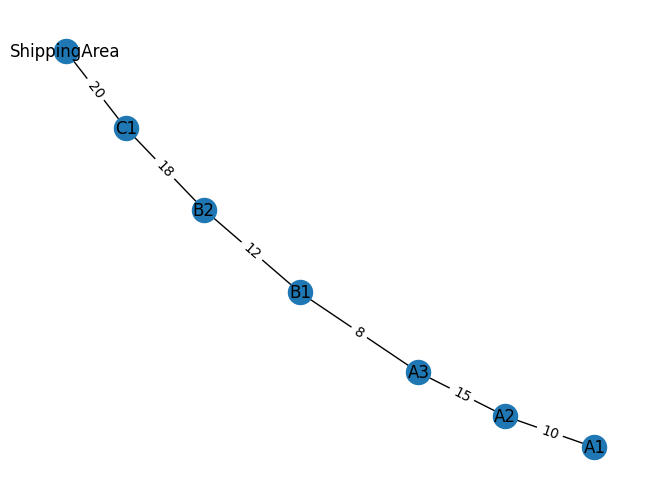

Selected Algorithm: Nearest-Neighbor, Start Vertex: A1, End Vertex: Shipping Area
Nearest-Neighbor Result: (['A1', 'A2', 'A1'], 20)
Selected Algorithm: Dijkstra, Start Vertex: A1, End Vertex: Shipping Area


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Python\Python39\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\wallacelt\AppData\Local\Temp\ipykernel_20416\1424915045.py", line 118, in run_algorithm
    result = dijkstra_shortest_path(self.graph, start_vertex, end_vertex)
  File "C:\Users\wallacelt\AppData\Local\Temp\ipykernel_20416\1424915045.py", line 39, in dijkstra_shortest_path
    current_vertex = min((vertex for vertex in graph.nodes if vertex not in distances or distances[vertex] < float('infinity')), key=lambda vertex: distances[vertex])
  File "C:\Users\wallacelt\AppData\Local\Temp\ipykernel_20416\1424915045.py", line 39, in <lambda>
    current_vertex = min((vertex for vertex in graph.nodes if vertex not in distances or distances[vertex] < float('infinity')), key=lambda vertex: distances[vertex])
KeyboardInterrupt


In [1]:
import tkinter as tk
from tkinter import ttk
import networkx as nx
import matplotlib.pyplot as plt

def create_warehouse_layout():
    G = nx.Graph()

    # Define the vertices (aisle intersections)
    vertices = ["A1", "A2", "A3", "B1", "B2", "C1", "ShippingArea"]

    G.add_nodes_from(vertices)

    # Define the edges (aisles) and assign weights
    edges = [
        ("A1", "A2", 10),
        ("A2", "A3", 15),
        ("A3", "B1", 8),
        ("B1", "B2", 12),
        ("B2", "C1", 18),
        ("C1", "ShippingArea", 20)
    ]

    G.add_weighted_edges_from(edges)

    return G

def visualize_warehouse_layout(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels={(i, j): f"{graph[i][j]['weight']}" for i, j in graph.edges()})
    plt.show()

def dijkstra_shortest_path(graph, start_vertex, end_vertex):
    distances = {vertex: float('infinity') for vertex in graph.nodes}
    distances[start_vertex] = 0

    while True:
        current_vertex = min((vertex for vertex in graph.nodes if vertex not in distances or distances[vertex] < float('infinity')), key=lambda vertex: distances[vertex])

        if distances[current_vertex] == float('infinity'):
            break

        for neighbor, edge_data in graph[current_vertex].items():
            distance_to_neighbor = distances[current_vertex] + edge_data['weight']

            if distance_to_neighbor < distances[neighbor]:
                distances[neighbor] = distance_to_neighbor

    return distances[end_vertex]


def nearest_neighbor(graph, start_vertex):
    unvisited_vertices = set(graph.nodes)
    current_vertex = start_vertex
    path = [current_vertex]

    while unvisited_vertices:
        neighbors = list(graph.neighbors(current_vertex))
        unvisited_neighbors = unvisited_vertices.intersection(neighbors)

        if not unvisited_neighbors:
            break

        next_vertex = min(unvisited_neighbors, key=lambda vertex: graph[current_vertex][vertex]['weight'])
        path.append(next_vertex)
        current_vertex = next_vertex
        unvisited_vertices.remove(current_vertex)

    # Return the path and the total distance
    total_distance = sum(graph[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
    return path, total_distance

class AlgorithmSelectorGUI:
    def __init__(self, root, graph):
        self.root = root
        self.root.title("Algorithm Selector GUI")

        self.graph = graph

        self.start_vertex_var = tk.StringVar()
        self.end_vertex_var = tk.StringVar()
        self.algorithm_var = tk.StringVar()
        self.algorithm_var.set("Dijkstra")  # Default algorithm

        self.create_widgets()

    def create_widgets(self):
        # Entry widgets for start and end vertices
        start_label = ttk.Label(self.root, text="Start Vertex:")
        start_label.pack(pady=5)
        start_entry = ttk.Entry(self.root, textvariable=self.start_vertex_var)
        start_entry.pack(pady=5)

        end_label = ttk.Label(self.root, text="End Vertex:")
        end_label.pack(pady=5)
        end_entry = ttk.Entry(self.root, textvariable=self.end_vertex_var)
        end_entry.pack(pady=5)

        # Algorithm dropdown
        algorithm_label = ttk.Label(self.root, text="Select an Algorithm:")
        algorithm_label.pack(pady=5)
        algorithm_dropdown = ttk.Combobox(self.root, textvariable=self.algorithm_var, values=["Dijkstra", "Nearest-Neighbor"])
        algorithm_dropdown.pack(pady=5)

        # Run algorithm button
        run_button = ttk.Button(self.root, text="Run Algorithm", command=self.run_algorithm)
        run_button.pack(pady=10)

    def run_algorithm(self):
        start_vertex = self.start_vertex_var.get()
        end_vertex = self.end_vertex_var.get()
        selected_algorithm = self.algorithm_var.get()

        print(f"Selected Algorithm: {selected_algorithm}, Start Vertex: {start_vertex}, End Vertex: {end_vertex}")

        if selected_algorithm == "Dijkstra":
            result = dijkstra_shortest_path(self.graph, start_vertex, end_vertex)
            print("Dijkstra Result:", result)
        elif selected_algorithm == "Nearest-Neighbor":
            result = nearest_neighbor(self.graph, start_vertex)
            print("Nearest-Neighbor Result:", result)

if __name__ == "__main__":
    warehouse_graph = create_warehouse_layout()
    visualize_warehouse_layout(warehouse_graph)

    root = tk.Tk()
    app = AlgorithmSelectorGUI(root, warehouse_graph)
    root.mainloop()
